<a href="https://colab.research.google.com/github/Akanksha-Nakati/Football-Results-Analysis/blob/main/Football_Tournaments_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aim**
The primary objective is to delve into the intricate details and historical patterns of international football matches,

Understanding Match Dynamics: To analyze the outcomes of international football matches, focusing on the distribution of home wins, away wins, and draws, thereby shedding light on home advantage and competitive nature.

Scoring Patterns: To explore the commonality of scorelines, providing insights into the tactical and defensive aspects of the game.

Tournament Diversity and Popularity: To assess the prevalence and variety of tournaments represented in the dataset, thereby highlighting the multifaceted nature of international football competitions.

Geographical Distribution and Trends: To elucidate the global spread and hosting patterns of the matches, focusing on both country and continent-level insights.

Historical Evolution: To trace the evolution of the sport over time, identifying trends and significant deviations, particularly in the context of global events.

# **Dataset**
This dataset contains 45,315 entries and 9 columns. Here's a summary of its structure:

date: The date of the match (non-null, object type).

home_team: The home team in the match (non-null, object type).

away_team: The away team in the match (non-null, object type).

home_score: The number of goals scored by the home team (non-null, integer type).

away_score: The number of goals scored by the away team (non-null, integer type).

tournament: The name of the tournament (non-null, object type).

city: The city where the match was played (non-null, object type).

country: The country where the match was played (non-null, object type).

neutral: A boolean indicating whether the match was played at a neutral venue (non-null, boolean type).

The dataset appears to record details of football matches, including the teams involved, scores, tournament information, and location details. The entries start from as early as 1872, indicating historical data.



# **Installing Libraries**


In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [ ]:
pip install plotly

# **Importing Libraries**

In [ ]:
# basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Data Exploration**

In [ ]:
# Importing dataset
csv_file_path = '/results.csv'

df = pd.read_csv(csv_file_path)
df.head()

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [ ]:
print(f"This Dataset Includes {df.shape}")

This Dataset Includes (45315, 9)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45315 entries, 0 to 45314
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        45315 non-null  object
 1   home_team   45315 non-null  object
 2   away_team   45315 non-null  object
 3   home_score  45315 non-null  int64 
 4   away_score  45315 non-null  int64 
 5   tournament  45315 non-null  object
 6   city        45315 non-null  object
 7   country     45315 non-null  object
 8   neutral     45315 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
df.describe()

home_score    away_score
count  45315.000000  45315.000000
mean       1.739314      1.178241
std        1.746904      1.392095
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000

In [ ]:
df.describe(include=object)

date home_team away_team tournament          city        country
count        45315     45315     45315      45315         45315          45315
unique       15649       313       308        147          2048            268
top     2012-02-29    Brazil   Uruguay   Friendly  Kuala Lumpur  United States
freq            66       600       565      17773           678           1337

In [ ]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# **Exploratory Data Analysis**

## Pairplot

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


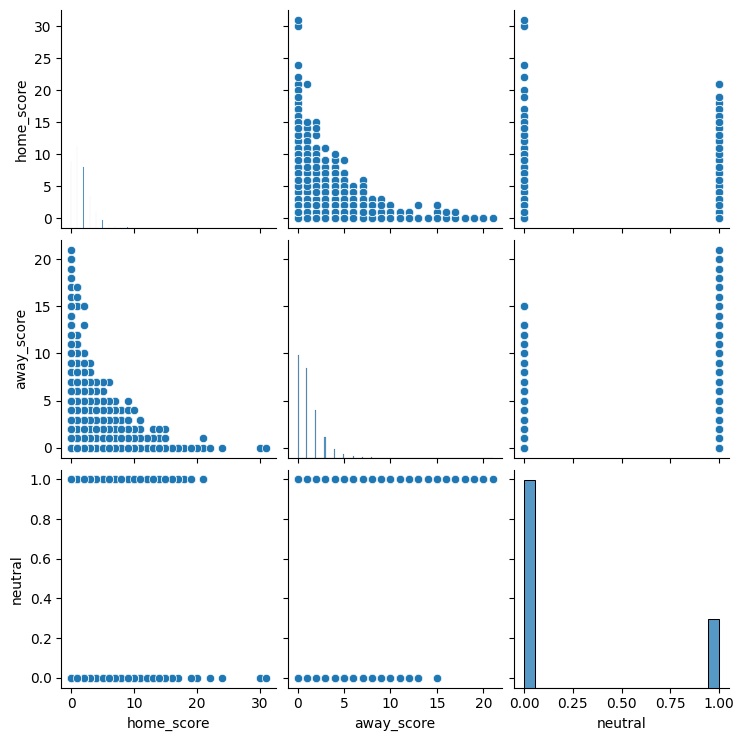

In [ ]:
sns.pairplot(data=df)

## Tournament Analysis

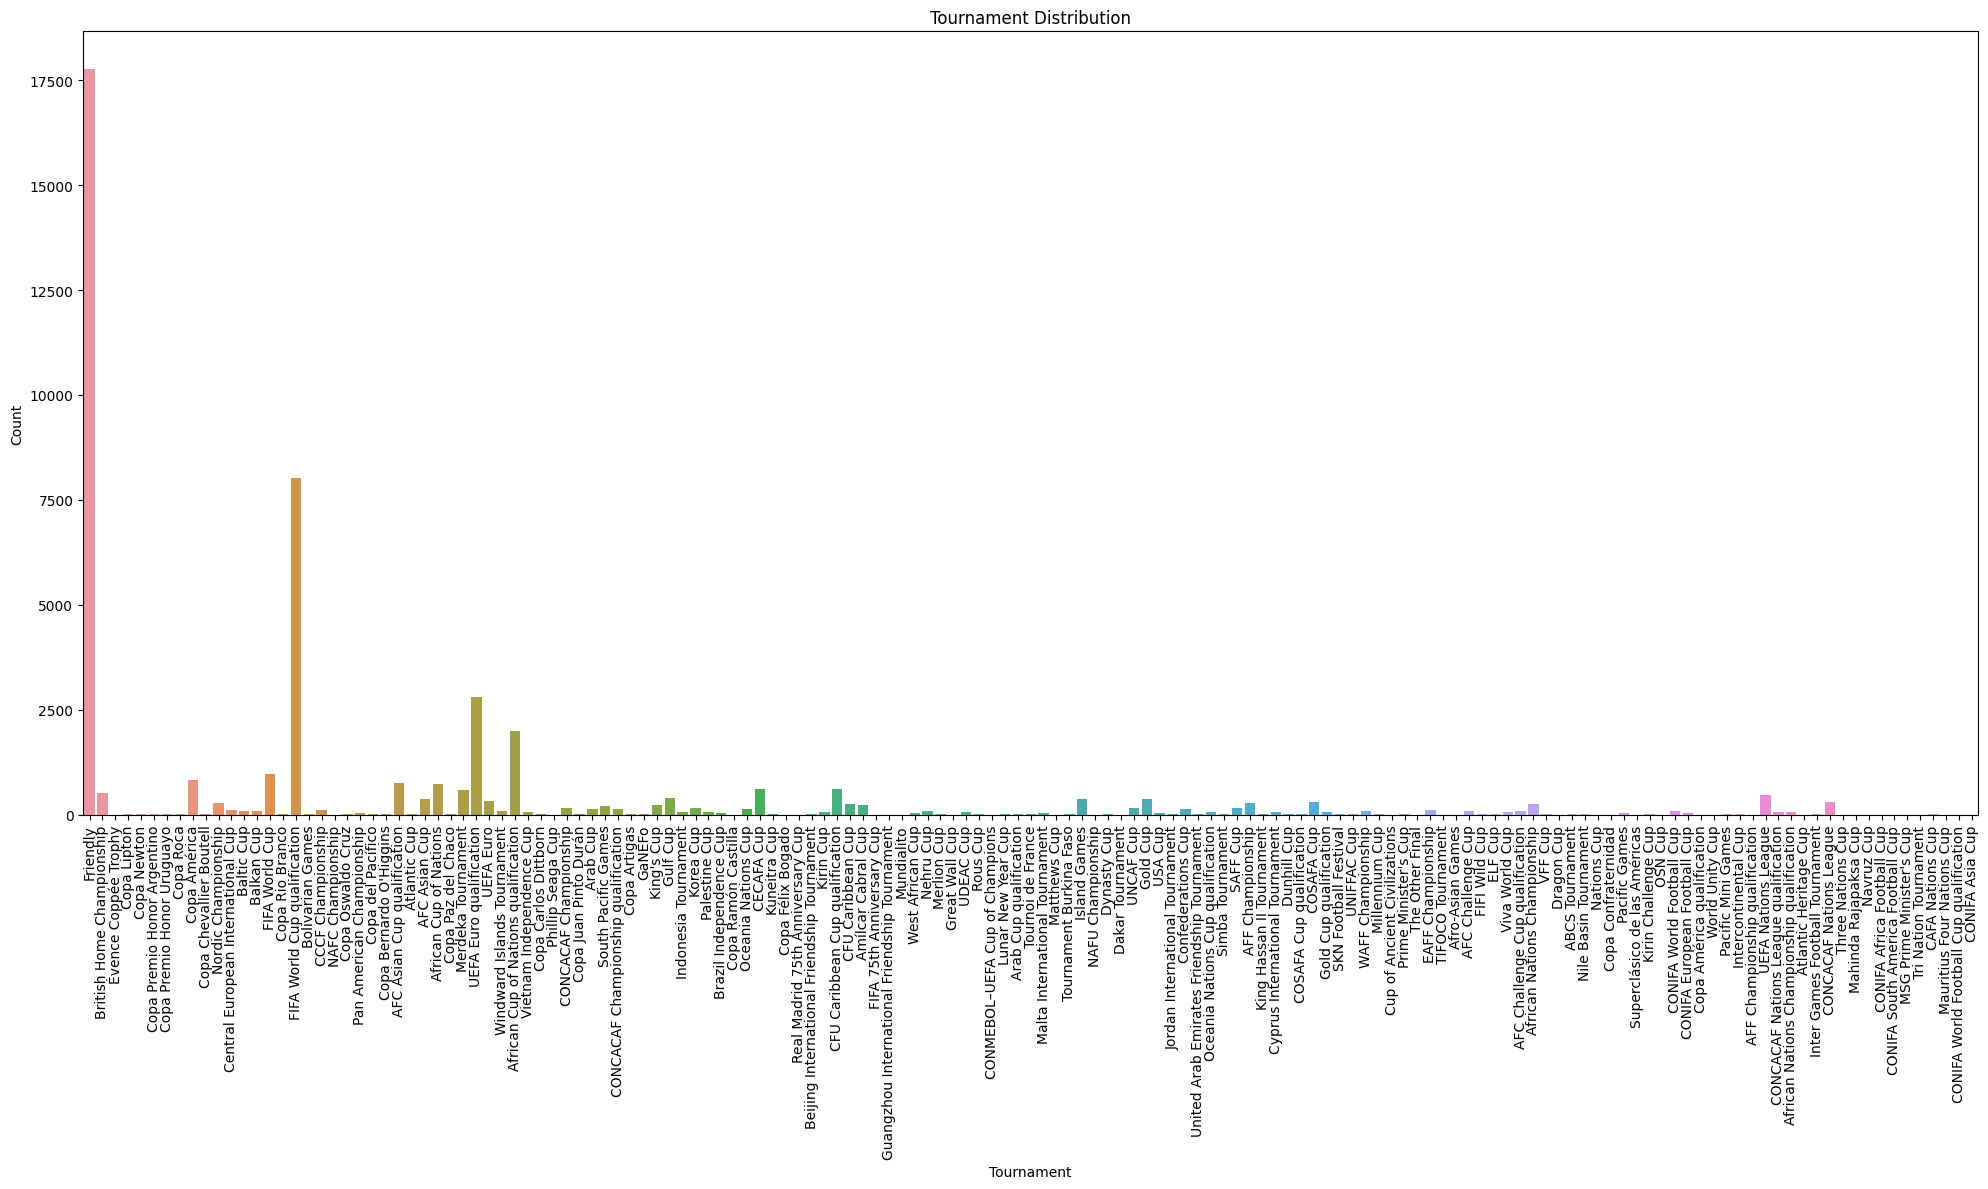

In [ ]:
plt.figure(figsize=(20, 12))
sns.countplot(x='tournament', data=df)
plt.xticks(rotation=90)
plt.title('Tournament Distribution')
plt.xlabel('Tournament')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Histogram of home scores

In [ ]:
fig = px.histogram(df, x='home_score', nbins=50, title='Home Score Distribution')
fig.show()

## Histogram of away scores

In [ ]:
fig = px.histogram(df, x='away_score', nbins=50, title='Away Score Distribution')
fig.show()

## Home and Away Scores

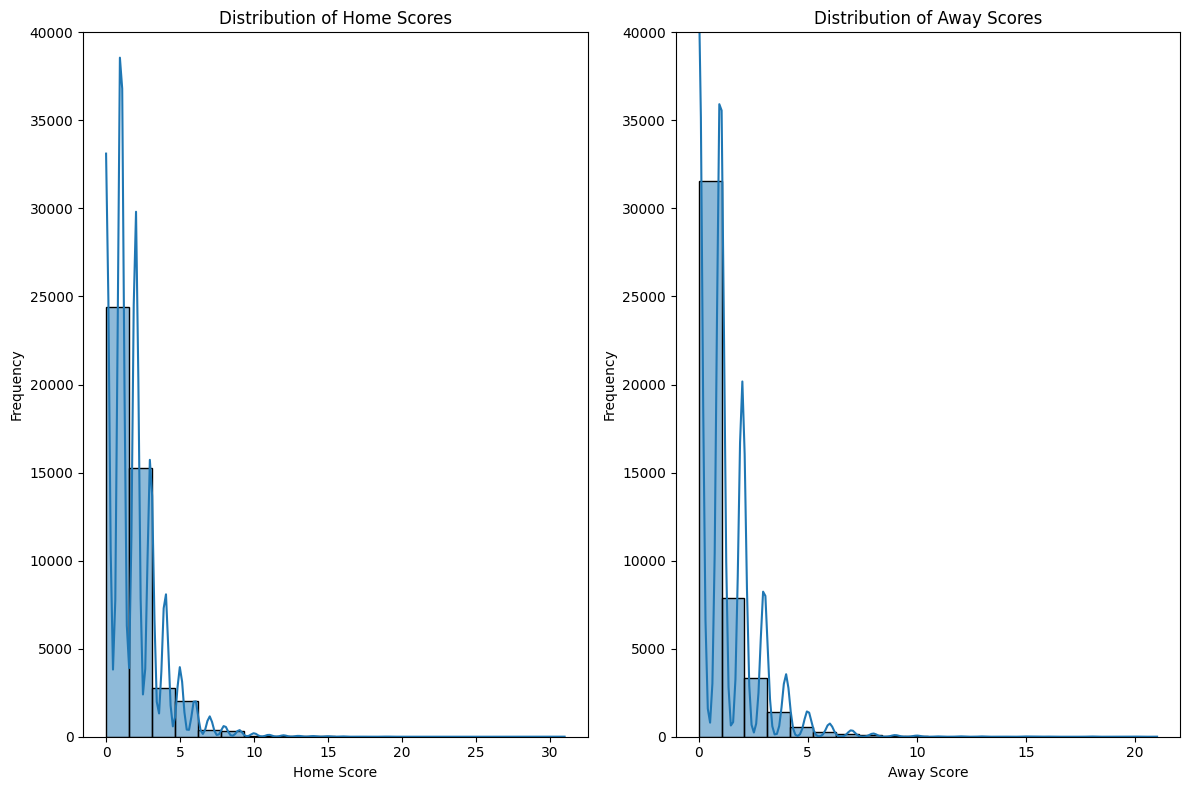

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['home_score'], bins=20, kde=True)
plt.title('Distribution of Home Scores')
plt.xlabel('Home Score')
plt.ylabel('Frequency')
#Setting limit for first plot
plt.ylim(0, 40000)


plt.subplot(1, 2, 2)
sns.histplot(df['away_score'], bins=20, kde=True)
plt.title('Distribution of Away Scores')
plt.xlabel('Away Score')
plt.ylabel('Frequency')
# Share y-axis between subplots
plt.ylim(0, 40000)

plt.tight_layout()
plt.show()

fig = px.line(df, x='date', y=['home_score', 'away_score'], title='Home and Away Scores Over Time')
fig.show()

# **Time Series Analysis**

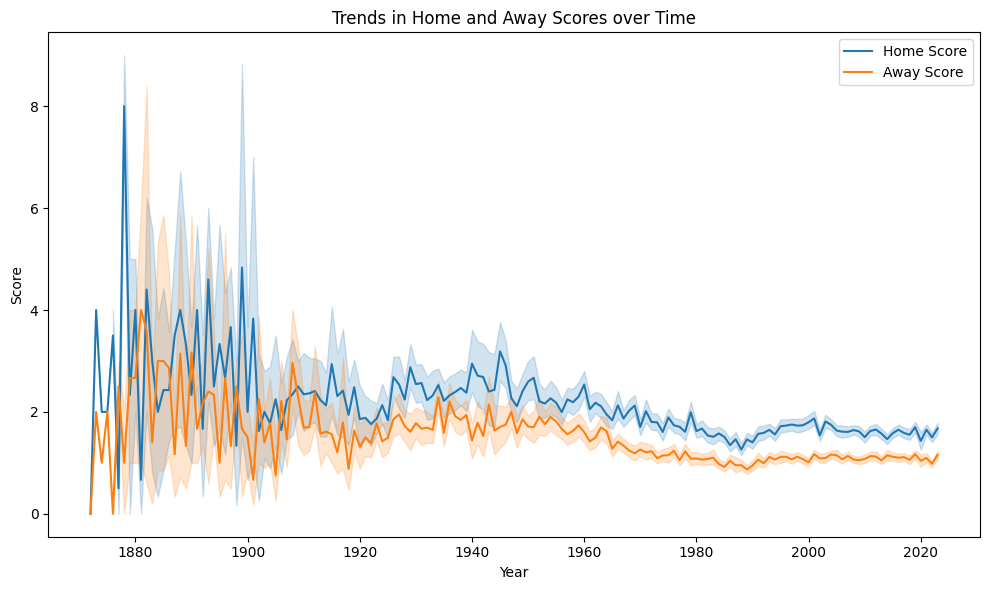

In [ ]:
# Create a new column for year
df['year'] = df['date'].dt.year

# Time series analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='home_score', data=df, label='Home Score')
sns.lineplot(x='year', y='away_score', data=df, label='Away Score')
plt.title('Trends in Home and Away Scores over Time')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

## Plot of Home Score by Team

In [ ]:
fig = px.box(df, x='home_team', y='home_score', title='Home Score by Team')
fig.show()

## Plot of Away Score by Team

In [ ]:
fig = px.box(df, x='away_team', y='away_score', title='Away Score by Team')
fig.show()

## Count of matches by tournament type

In [ ]:
fig = px.histogram(df, x='tournament', title='Count of Matches by Tournament Type')
fig.show()

In [ ]:
# Create a new column for total score
df['total_score'] = df['home_score'] + df['away_score']

# Plot total score over time
fig = px.line(df, x='date', y='total_score', title='Total Score Over Time')
fig.show()

In [ ]:
# Analyzing Match Outcomes

# Adding a new column for match outcome
df['outcome'] = df.apply(lambda row: 'Home Win' if row['home_score'] > row['away_score'] else ('Away Win' if row['home_score'] < row['away_score'] else 'Draw'), axis=1)

# Counting the outcomes
match_outcomes = df['outcome'].value_counts()

# **Analysis**

## Match Outcomes

Let's start by analyzing the match outcomes to understand the distribution of home wins, away wins, and draws.

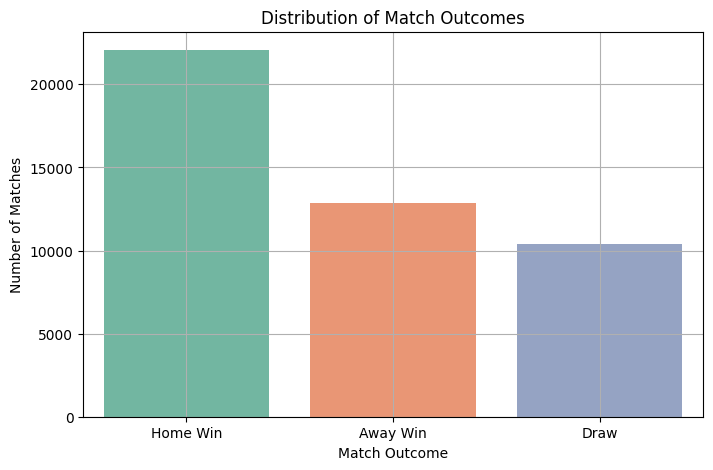

Home Win    22060
Away Win    12838
Draw        10417
Name: outcome, dtype: int64

In [ ]:
# It seems the matplotlib and seaborn libraries need to be re-imported due to the reset environment
import matplotlib.pyplot as plt
import seaborn as sns

# Re-plotting the match outcomes
plt.figure(figsize=(8, 5))
sns.barplot(x=match_outcomes.index, y=match_outcomes.values, palette="Set2")
plt.title('Distribution of Match Outcomes')
plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

match_outcomes

Above bar chart illustrates the distribution of match outcomes in the dataset:

Home Wins: There are 22,060 instances where the home team won the match.

Away Wins: The away team won 12,838 matches.

Draws: There were 10,417 matches that ended in a draw.


These results indicate a home advantage, as there are more home wins compared to away wins and draws.

## Score Analysis

Now, let's examine the common scores in these matches, which will give an insight into the number of goals scored per game.

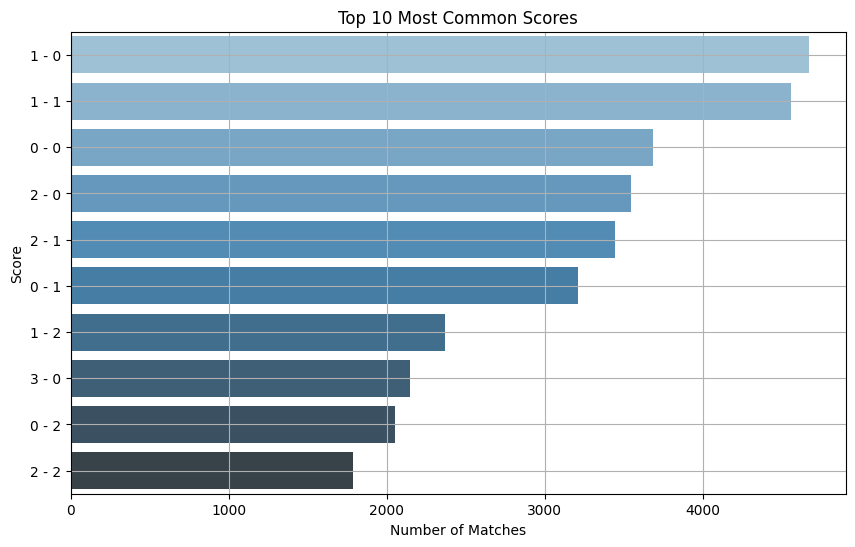

1 - 0    4670
1 - 1    4559
0 - 0    3684
2 - 0    3548
2 - 1    3447
0 - 1    3208
1 - 2    2370
3 - 0    2147
0 - 2    2053
2 - 2    1785
Name: match_score, dtype: int64

In [ ]:
# Analyzing Common Scores in Matches

# Creating a new column for match score
df['match_score'] = df['home_score'].astype(str) + " - " + df['away_score'].astype(str)

# Counting the most common scores
common_scores = df['match_score'].value_counts().head(10)

# Plotting the most common scores
plt.figure(figsize=(10, 6))
sns.barplot(x=common_scores.values, y=common_scores.index, palette="Blues_d")
plt.title('Top 10 Most Common Scores')
plt.xlabel('Number of Matches')
plt.ylabel('Score')
plt.grid(True)
plt.show()

common_scores


Above bar chart shows the top 10 most common scores in the matches from the dataset:

1 - 0: This score occurred in 4,670 matches, making it the most common scoreline.

1 - 1: A total of 4,559 matches ended with a 1 - 1 score.

0 - 0: 3,684 matches ended without any goals from either side.

2 - 0 and 2 - 1: These scores are also quite common, occurring in 3,548 and 3,447 matches respectively.


The prevalence of low-scoring results like 1 - 0, 1 - 1, and 0 - 0 suggests that closely contested matches are frequent in this dataset.

## Tournament Analysis

Now, we can analyze the most common tournaments

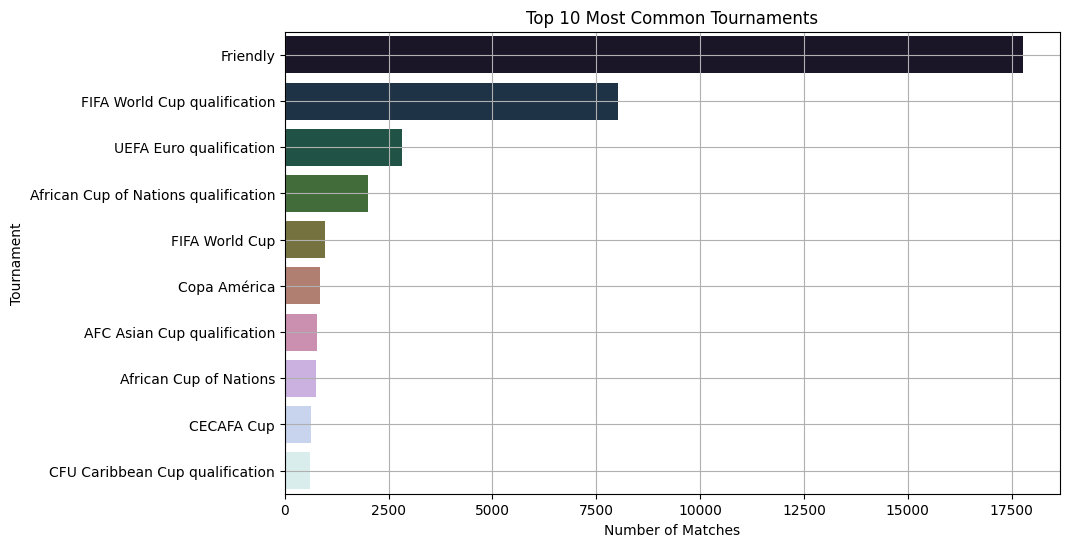

Friendly                                17773
FIFA World Cup qualification             8016
UEFA Euro qualification                  2815
African Cup of Nations qualification     1998
FIFA World Cup                            964
Copa América                              841
AFC Asian Cup qualification               764
African Cup of Nations                    741
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Name: tournament, dtype: int64

In [ ]:
# Tournament Analysis: Identifying the most common tournaments

top_tournaments = df['tournament'].value_counts().head(10)

# Plotting the top tournaments
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tournaments.values, y=top_tournaments.index, palette="cubehelix")
plt.title('Top 10 Most Common Tournaments')
plt.xlabel('Number of Matches')
plt.ylabel('Tournament')
plt.grid(True)
plt.show()

top_tournaments


The bar chart shows the top 10 most common tournaments in the dataset:

Friendly: By far the most common type of match, with 17,773 instances. These are exhibition matches and not part of any tournament.

FIFA World Cup qualification: The second most common, with 8,016 matches. These are matches played as part of the qualification process for the FIFA World Cup.

UEFA Euro qualification: There are 2,815 matches in this category, related to the qualification for the UEFA European Championship.

African Cup of Nations qualification: With 1,998 matches, indicating qualification games for the African Cup of Nations.

Other notable tournaments include the FIFA World Cup, Copa América, AFC Asian Cup qualification, African Cup of Nations, CECAFA Cup, and CFU Caribbean Cup qualification.

This variety shows the dataset includes a wide range of international football matches, encompassing both friendly games and various competitive tournaments.

## Location Analysis

Now, we can look into the location analysis to see which countries or cities have hosted the most matches.

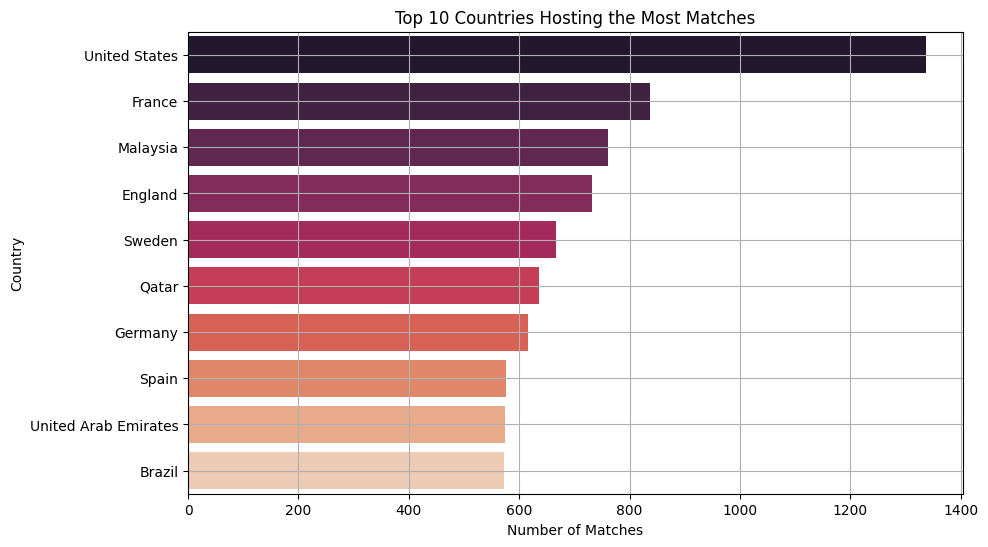

United States           1337
France                   837
Malaysia                 760
England                  731
Sweden                   666
Qatar                    636
Germany                  616
Spain                    576
United Arab Emirates     574
Brazil                   572
Name: country, dtype: int64

In [ ]:
# Location Analysis: Countries which hosted the most matches

top_host_countries = df['country'].value_counts().head(10)

# Plotting the top host countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_host_countries.values, y=top_host_countries.index, palette="rocket")
plt.title('Top 10 Countries Hosting the Most Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Country')
plt.grid(True)
plt.show()

top_host_countries


The bar chart displays the top 10 countries that have hosted the most matches according to the dataset:

United States: Leads with 1,337 matches hosted.

France: Follows with 837 matches.

Malaysia: Has hosted 760 matches.

Other countries in the list include England, Sweden, Qatar, Germany, Spain, United Arab Emirates, and Brazil.

These results indicate a diverse range of locations for international football matches, with the United States being the most frequent host.



## Historical Trends

Finally, let's observe historical trends in terms of the frequency of matches over time. This analysis can show us how the popularity or frequency of international matches has changed throughout the years. ​

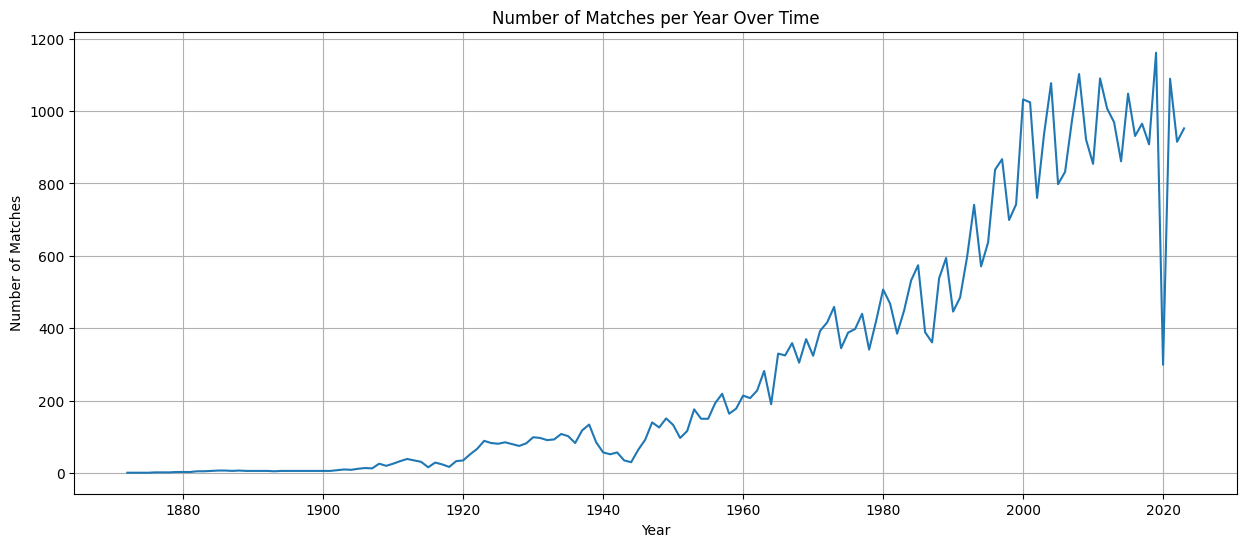

year
2004    1077
2005     798
2006     832
2007     976
2008    1102
2009     921
2010     854
2011    1090
2012    1007
2013     969
2014     861
2015    1048
2016     931
2017     965
2018     908
2019    1161
2020     299
2021    1089
2022     915
2023     952
dtype: int64

In [ ]:
# Historical Trends: Frequency of matches over time

# Extracting year from the date
df['year'] = pd.to_datetime(df['date']).dt.year

# Aggregating matches by year
matches_per_year = df.groupby('year').size()

# Plotting matches per year
plt.figure(figsize=(15, 6))
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values)
plt.title('Number of Matches per Year Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

# Displaying recent trend more clearly
recent_trend = matches_per_year.tail(20)
recent_trend


## Geographical Analysis

Exploring geographical insights based on the analysis with an understanding of the global distribution and patterns in international football matches.

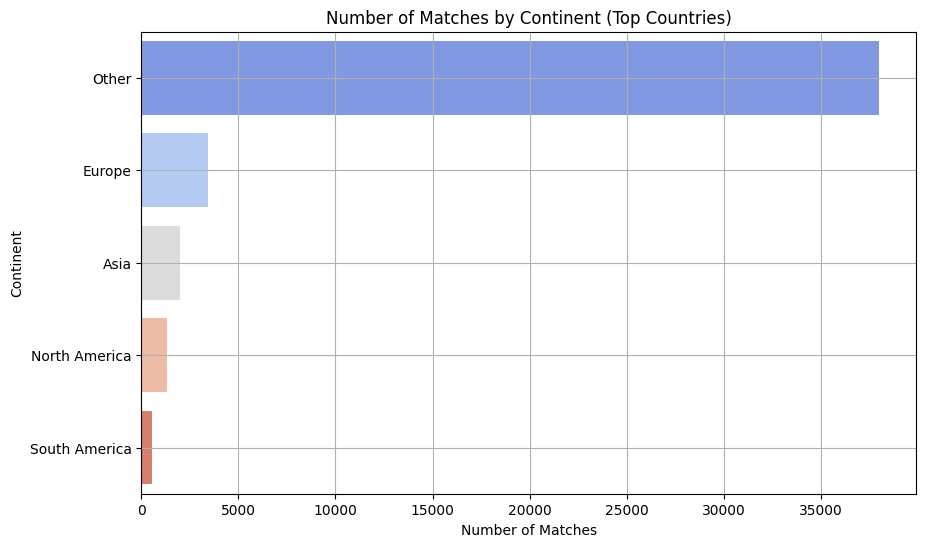

Other            38010
Europe            3426
Asia              1970
North America     1337
South America      572
Name: continent, dtype: int64

In [ ]:
# Manual mapping of top countries to their respective continents
# This mapping is based on the top countries identified in the previous analysis

country_continent_map = {
    "United States": "North America",
    "France": "Europe",
    "Malaysia": "Asia",
    "England": "Europe",
    "Sweden": "Europe",
    "Qatar": "Asia",
    "Germany": "Europe",
    "Spain": "Europe",
    "United Arab Emirates": "Asia",
    "Brazil": "South America"
}

# Mapping countries in the dataset to continents
df['continent'] = df['country'].map(country_continent_map).fillna("Other")

# Counting matches by continent
matches_by_continent = df['continent'].value_counts()

# Plotting matches by continent
plt.figure(figsize=(10, 6))
sns.barplot(x=matches_by_continent.values, y=matches_by_continent.index, palette="coolwarm")
plt.title('Number of Matches by Continent (Top Countries)')
plt.xlabel('Number of Matches')
plt.ylabel('Continent')
plt.grid(True)
plt.show()

matches_by_continent


The bar chart shows the distribution of matches by continent, focusing on the top countries identified in our dataset:


Other: A significant majority of the matches, 38,010 in total, are categorized under "Other". This category includes matches from countries not in our top list and thus not mapped to a specific continent.


Europe: Hosted 3,426 matches, making it the leading continent among the top countries analyzed.


Asia: Comes next with 1,970 matches, reflecting the presence of countries like Malaysia, Qatar, and the United Arab Emirates in our top countries list.


North America: With 1,337 matches, primarily from the United States.

South America: Hosted 572 matches, with Brazil being the representative country in the top list.